TASK 2

1.Put everything into a class called LogisticRegression. The training method should be "minibatch".

2.Perform a classification on the data given above.

3.Plot training losses as number of iters increases.

4.Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

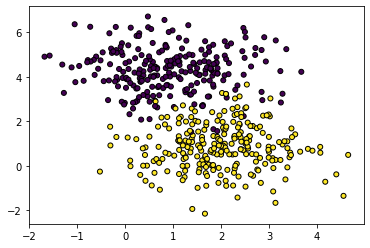

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [2]:
# 1.2 Feature scale your data to reach faster convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 1.3 Train test split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# 1.4 Add intercepts
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [3]:
class LogisticRegression:
    def __init__(self, alpha=0.0001, loss_old=10000,max_iter=20000):
        self.alpha = alpha
        self.loss_old = loss_old
        self.loss = []
        self.max_iter = max_iter
        
        

    def  fit(self,X,y):
        self.w = np.zeros(X.shape[1])
        

        batch_size = int(0.1*X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0,X.shape[0])
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]

            cost,grad = self.gradient(batch_X,batch_y)
            if i %500 == 0 :
                print(f"Loss at iteration {i}", cost)
                self.loss.append(cost)
            self.w = self.w - self.alpha * grad 
    
    def sigmoid(self,x): #use for predict
        return 1/ (1+np.exp(-x))

    def gradient(self,X,y):
        h = self.h_theta(X)
        error = h-y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad


    def h_theta(self,X):
        return self.sigmoid(X @ self.w)
        
    def predict(self,X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(np.arange(len(self.loss)) , self.loss, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
        





Loss at iteration 0 24.26015131959808
Loss at iteration 500 16.44321122787284
Loss at iteration 1000 12.021878691562971
Loss at iteration 1500 11.183808477027116
Loss at iteration 2000 9.906080925385787
Loss at iteration 2500 8.049122969368932
Loss at iteration 3000 5.548454205475574
Loss at iteration 3500 5.285586379630343
Loss at iteration 4000 7.484616509771916
Loss at iteration 4500 5.228725564539245
Loss at iteration 5000 4.478066228721961
Loss at iteration 5500 5.760555371264019
Loss at iteration 6000 4.989878181904999
Loss at iteration 6500 6.961230255725912
Loss at iteration 7000 3.6040509533700504
Loss at iteration 7500 4.092844726621907
Loss at iteration 8000 3.313734506844203
Loss at iteration 8500 4.958966481970472
Loss at iteration 9000 3.3641449235596133
Loss at iteration 9500 4.74403445858938
Loss at iteration 10000 1.5346456200222391
Loss at iteration 10500 1.0732431878633892
Loss at iteration 11000 4.714017321043741
Loss at iteration 11500 3.379125022471907
Loss at ite

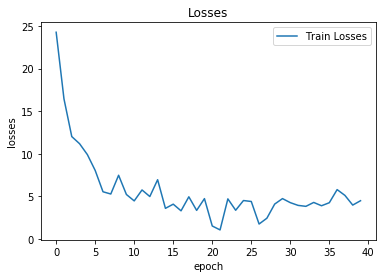

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.plot()

In [10]:
class classification_reports:
    def __init__(self,actual, predicted):
        self.actual = actual
        self.predicted = predicted
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN)/ float( self.TP + self.TN + self.FN + self.FP)
        return self.acc
    
    def recall(self):
        self.recall = (100* self.TP)/ float(self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = 100* (self.TP)/ float(self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1

    def summary(self):   
        print(f"Accuracy: {self.accuracy()}")
        print(f"Recall: {self.recall()}")
        print(f"Precision: {self.precision()}")
        print(f"F1: {self.f1()}")


In [14]:
from sklearn.metrics import classification_report
model_report = classification_reports(y_test, yhat)
model_report.summary()
print("Report: ",classification_report(y_test, yhat))

Accuracy: 95.33333333333333
Recall: 97.22222222222223
Precision: 93.33333333333333
F1: 95.23809523809526
Report:                precision    recall  f1-score   support

           0       0.97      0.94      0.95        78
           1       0.93      0.97      0.95        72

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

